In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('run250k2.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,overall_rank,units
0,0,S,S,S,S,Bartre-Guy-Lyn
1,1,S,S,S,S,Dart-Bartre-Lyn
2,2,S,S,S,S,Lucius-Florina-Lyn
3,3,S,S,S,S,Sain-Kent-Eliwood
4,4,S,S,S,S,Marcus-Dart-Eliwood


In [4]:
data['victory_rank'].value_counts()

S    208153
F     41847
Name: victory_rank, dtype: int64

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

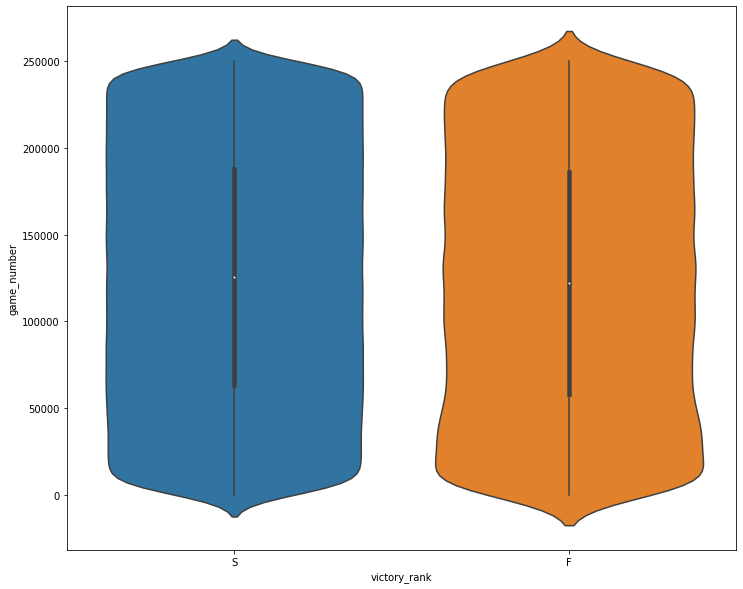

In [9]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data)

In [12]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,overall_rank,units,unit_1,unit_2,unit_3
0,0,S,S,S,S,Bartre-Guy-Lyn,Bartre,Guy,Lyn
1,1,S,S,S,S,Dart-Bartre-Lyn,Dart,Bartre,Lyn
2,2,S,S,S,S,Lucius-Florina-Lyn,Lucius,Florina,Lyn
3,3,S,S,S,S,Sain-Kent-Eliwood,Sain,Kent,Eliwood
4,4,S,S,S,S,Marcus-Dart-Eliwood,Marcus,Dart,Eliwood
5,5,F,S,S,D,Rebecca-Lucius-Lyn,Rebecca,Lucius,Lyn
6,6,S,S,S,S,Marcus-Sain-Hector,Marcus,Sain,Hector
7,7,S,S,S,S,Heath-Erk-Hector,Heath,Erk,Hector
8,8,S,S,S,S,Dart-Bartre-Lyn,Dart,Bartre,Lyn
9,9,S,S,S,S,Dorcas-Lowen-Hector,Dorcas,Lowen,Hector


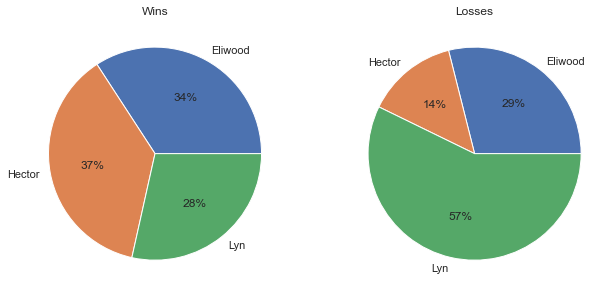

In [70]:
#d1 = data.groupby('victory_rank')[['victory_rank', 'unit_1', 'unit_2', 'unit_3']]
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.0f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

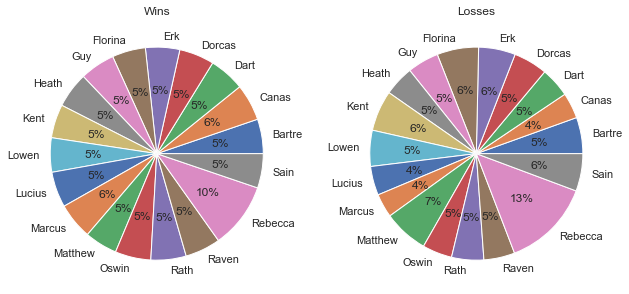

In [83]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()